In [17]:
# importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:

import pandas as pd

# Load the data
df_train = pd.read_csv('C:\\Projects\\Kaggle\\playground-series-s5e1\\train.csv')
df_test = pd.read_csv('C:\\Projects\\Kaggle\\playground-series-s5e1\\test.csv')



In [4]:
df_train.head()


,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [5]:
df_train.shape


(230130, 6)

In [6]:
df_train.isnull().sum()


id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

It can be seen df_train column that is the target has null value in it, around 8871 out of total 2 lakh row¶
It need to be imputed further so that it doesnot impact the forecasting of target
Simple way is to replace with mean, median

In [7]:
df_test.isnull().sum()


id         0
date       0
country    0
store      0
product    0
dtype: int64

In [8]:
df_train['num_sold'] = df_train['num_sold'].fillna(df_train['num_sold'].mean())
df_train['num_sold'].mean()


752.5273819370059

In [9]:
df_train['store'].unique()


array(['Discount Stickers', 'Stickers for Less', 'Premium Sticker Mart'],
      dtype=object)

In [10]:
df_train['country'].unique()


array(['Canada', 'Finland', 'Italy', 'Kenya', 'Norway', 'Singapore'],
      dtype=object)

In [11]:
df_train.columns


Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

In [12]:
df_train['product'].unique()


array(['Holographic Goose', 'Kaggle', 'Kaggle Tiers', 'Kerneler',
       'Kerneler Dark Mode'], dtype=object)

 Here we have overall 5 product 
 so in all we have in dataframe 5 products, 6 country and 3 stickers to play around with it 
 where these information is gathered from 2010 till 2016

In [13]:
df_train['date'].unique()


array(['2010-01-01', '2010-01-02', '2010-01-03', ..., '2016-12-29',
       '2016-12-30', '2016-12-31'], dtype=object)

In [14]:
df_train['date'].min(),df_train['date'].max()


('2010-01-01', '2016-12-31')

In [15]:
# Lets break down further into data side ,product,store,country,date,num_sold

dproduct = df_train.groupby(['product'])['num_sold'].sum()
dproduct

product
Holographic Goose     1.397712e+07
Kaggle                5.672173e+07
Kaggle Tiers          4.687031e+07
Kerneler              2.564500e+07
Kerneler Dark Mode    2.996496e+07
Name: num_sold, dtype: float64

<Axes: xlabel='product', ylabel='num_sold'>

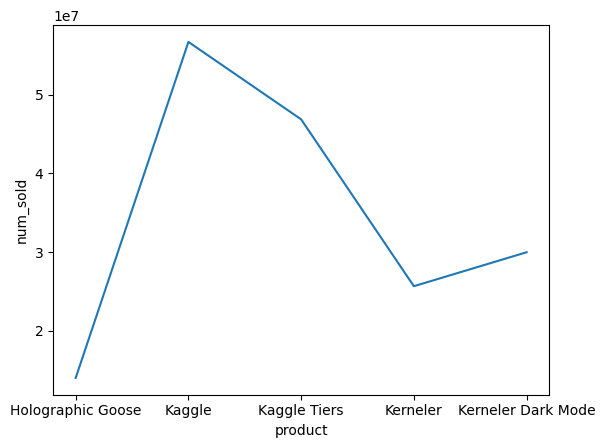

In [18]:
sns.lineplot(dproduct)


In [19]:
dcountry = df_train.groupby(['country'])['num_sold'].sum()
dcountry

country
Canada       3.184833e+07
Finland      2.869887e+07
Italy        2.079767e+07
Kenya        4.169580e+06
Norway       5.456230e+07
Singapore    3.310237e+07
Name: num_sold, dtype: float64

<Axes: xlabel='country', ylabel='num_sold'>

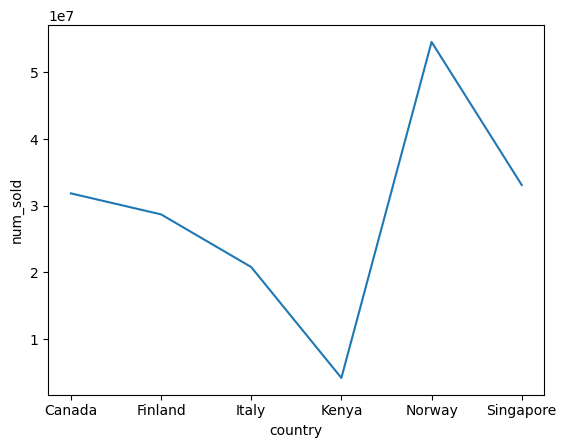

In [20]:
sns.lineplot(dcountry)


In [21]:
dstore = df_train.groupby(['store'])['num_sold'].sum()
dstore

store
Discount Stickers       3.449658e+07
Premium Sticker Mart    7.447592e+07
Stickers for Less       6.420664e+07
Name: num_sold, dtype: float64

<Axes: xlabel='store', ylabel='num_sold'>

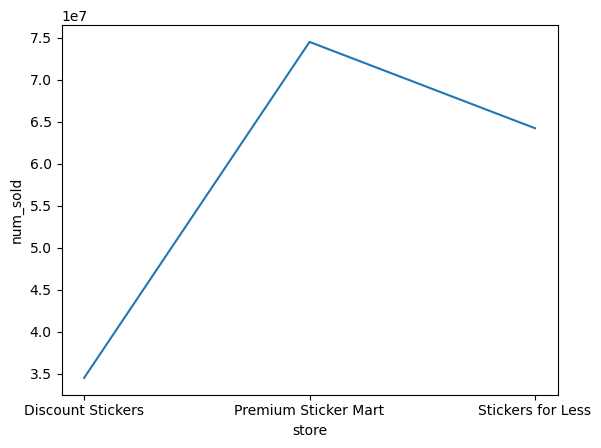

In [22]:
sns.lineplot(dstore)


In [23]:
dfsold_min = df_train.groupby(['product','store','country'])['num_sold'].min()
dfsold_min

product             store              country  
Holographic Goose   Discount Stickers  Canada       752.527382
                                       Finland       65.000000
                                       Italy         44.000000
                                       Kenya        752.527382
                                       Norway       105.000000
                                                       ...    
Kerneler Dark Mode  Stickers for Less  Finland      468.000000
                                       Italy        327.000000
                                       Kenya         10.000000
                                       Norway       749.000000
                                       Singapore    486.000000
Name: num_sold, Length: 90, dtype: float64

In [24]:
df_sold_max = df_train.groupby(['product','store','country']).max()
df_sold_max


id        date  \
product            store             country                         
Holographic Goose  Discount Stickers Canada     230040  2016-12-31   
                                     Finland    230055  2016-12-31   
                                     Italy      230070  2016-12-31   
                                     Kenya      230085  2016-12-31   
                                     Norway     230100  2016-12-31   
...                                                ...         ...   
Kerneler Dark Mode Stickers for Less Finland    230064  2016-12-31   
                                     Italy      230079  2016-12-31   
                                     Kenya      230094  2016-12-31   
                                     Norway     230109  2016-12-31   
                                     Singapore  230124  2016-12-31   

                                                   num_sold  
product            store             country                 
Holographic Goose  Discount Stickers Canada      752.527382  
                                     Finland     195.000000  
                                     Italy       135.000000  
                                     Kenya       752.527382  
                                     Norway      352.000000  
...                                                     ...  
Kerneler Dark Mode Stickers for Less Finland    1272.000000  
                                     Italy       898.000000  
                                     Kenya        34.000000  
                                     Norway     2740.000000  
                                     Singapore  1421.000000  

[90 rows x 3 columns]

In [25]:
df_m = df_train.loc[df_train.groupby(['store','product'])['num_sold'].idxmax()].reset_index(drop=True)


In [26]:
df_m

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,752.527382
1,131281,2013-12-29,Norway,Discount Stickers,Kaggle,2488.000000
2,131282,2013-12-29,Norway,Discount Stickers,Kaggle Tiers,2084.000000
3,131283,2013-12-29,Norway,Discount Stickers,Kerneler,1164.000000
4,75214,2012-04-15,Norway,Discount Stickers,Kerneler Dark Mode,1298.000000
5,131290,2013-12-29,Norway,Premium Sticker Mart,Holographic Goose,908.000000
6,98531,2012-12-30,Norway,Premium Sticker Mart,Kaggle,5939.000000
7,131292,2013-12-29,Norway,Premium Sticker Mart,Kaggle Tiers,4958.000000
8,131293,2013-12-29,Norway,Premium Sticker Mart,Kerneler,2496.000000
9,43094,2011-04-24,Norway,Premium Sticker Mart,Kerneler Dark Mode,3127.000000


In [27]:
df_train.columns


Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

In [28]:
def extract_date_features(df):    
    df['date'] = pd.to_datetime(df['date']) 
    df['month'] = df['date'].dt.month
    df['weekday'] = df['date'].dt.weekday 
    df['week'] = df['date'].dt.isocalendar().week
    #df['day_of_year'] = df['date'].dt.dayofyear
    #df['day_of_week'] = df['date'].dt.dayofweek       
    #df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    #df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
    df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)
    #df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
    #df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)
    df['week_sin'] = np.sin(2 * np.pi * df['week'] / 52)
    df['week_cos'] = np.cos(2 * np.pi * df['week'] / 52)
    return df

In [29]:
def create_features(df):    
    df['country_store'] = df['country'] + "_" + df['store']   
    df['store_product'] = df['store'] + "_" + df['product']   
    df['country_product'] = df['country'] + "_" + df['product']
    #df['product_category'] = df['product'].apply(lambda x: 'Sticker' if 'Sticker' in x else 'Merchandise')
    #df = pd.get_dummies(df, columns=['country'], prefix='region')
    #store_mapping = {'Discount Stickers': 0, 'Premium Stickers': 1}  
    #df['store_type'] = df['store'].map(store_mapping)
    return df

df_train = create_features(df_train)
df_test = create_features(df_test)

In [30]:
df_train = extract_date_features(df_train)
df_test = extract_date_features(df_test)

In [31]:
start_date = df_train['date'].min()


In [32]:
df_train = df_train.drop(['id','date'],axis=1)


In [33]:
df_train['num_sold'].max(),df_train['num_sold'].min()


(5939.0, 5.0)

In [34]:
df_train['num_sold'] = (df_train['num_sold']-df_train['num_sold'].min())/df_train['num_sold'].max()

In [35]:
df_train['num_sold'].unique()


array([0.12586755, 0.1629904 , 0.15170904, ..., 0.57939047, 0.38070382,
       0.67199865])

In [36]:
from scipy.stats import skew


 lets check the skwness of the num_sold 
 if 0 it is symmetric
 if >0 then it is right skewed
 if <0 then it is left skewed

In [37]:
from scipy.stats import skew
skewness = skew(df_train['num_sold'],nan_policy='omit')
print(f'skewness of num_sold:{skewness}')

skewness of num_sold:1.4434583174677849


df_train['num_sold'] is higly skewed¶


In [39]:
df_train['num_sold'] = np.log1p(df_train['num_sold'])
df_train['num_sold']

0         0.118554
1         0.150995
2         0.141247
3         0.068016
4         0.078656
            ...   
230125    0.074757
230126    0.397859
230127    0.326610
230128    0.189201
230129    0.240801
Name: num_sold, Length: 230130, dtype: float64

In [40]:
skewness = skew(df_train['num_sold'],nan_policy='omit')
print(f'skewness of num_sold: {skewness}')

skewness of num_sold: 1.1014876736424721


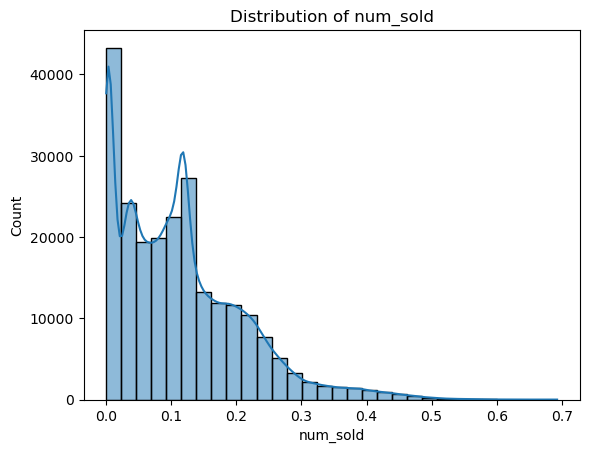

In [41]:
sns.histplot(df_train['num_sold'],kde=True,bins=30)
plt.title("Distribution of num_sold")
plt.show()

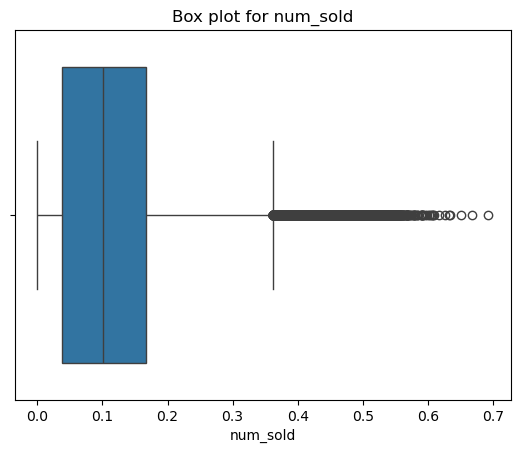

In [42]:
sns.boxplot(x=df_train['num_sold'])
plt.title("Box plot for num_sold")
plt.show()

In [43]:
# Lets detect outliers present in the num_sold target 

q1 = df_train['num_sold'].quantile(0.25)
q3 = df_train['num_sold'].quantile(0.75)
iqr = q3-q1

In [44]:
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr

In [45]:
outliers = df_train[(df_train['num_sold']<lower_bound) | (df_train['num_sold']>upper_bound)]


In [46]:
outliers.head()


,country,store,product,num_sold,country_store,store_product,country_product,month,weekday,week,weekday_sin,weekday_cos,week_sin,week_cos
66,Norway,Stickers for Less,Kaggle,0.448796,Norway_Stickers for Less,Stickers for Less_Kaggle,Norway_Kaggle,1,4,53,-0.433884,-0.900969,0.120537,0.992709
67,Norway,Stickers for Less,Kaggle Tiers,0.429915,Norway_Stickers for Less,Stickers for Less_Kaggle Tiers,Norway_Kaggle Tiers,1,4,53,-0.433884,-0.900969,0.120537,0.992709
71,Norway,Premium Sticker Mart,Kaggle,0.508364,Norway_Premium Sticker Mart,Premium Sticker Mart_Kaggle,Norway_Kaggle,1,4,53,-0.433884,-0.900969,0.120537,0.992709
72,Norway,Premium Sticker Mart,Kaggle Tiers,0.455332,Norway_Premium Sticker Mart,Premium Sticker Mart_Kaggle Tiers,Norway_Kaggle Tiers,1,4,53,-0.433884,-0.900969,0.120537,0.992709
156,Norway,Stickers for Less,Kaggle,0.467538,Norway_Stickers for Less,Stickers for Less_Kaggle,Norway_Kaggle,1,5,53,-0.974928,-0.222521,0.120537,0.992709


In [47]:
outliers.shape


(5575, 14)

In [48]:
df_train['num_sold'] = df_train['num_sold'].clip(lower=lower_bound,upper=upper_bound)
df_train['num_sold']

0         0.118554
1         0.150995
2         0.141247
3         0.068016
4         0.078656
            ...   
230125    0.074757
230126    0.361566
230127    0.326610
230128    0.189201
230129    0.240801
Name: num_sold, Length: 230130, dtype: float64

In [49]:
outliers1 = df_train[(df_train['num_sold']<lower_bound) | (df_train['num_sold']>upper_bound)]
outliers1

,country,store,product,num_sold,country_store,store_product,country_product,month,weekday,week,weekday_sin,weekday_cos,week_sin,week_cos


In [50]:
df_train.columns


Index(['country', 'store', 'product', 'num_sold', 'country_store',
       'store_product', 'country_product', 'month', 'weekday', 'week',
       'weekday_sin', 'weekday_cos', 'week_sin', 'week_cos'],
      dtype='object')

In [51]:
import pandas as pd

def target_encode(train_df, test_df, target_col, cat_cols):
    """
    Lets apply target encoding to categorical columns what actually happens.
    simply summary as we hv already seen wht each of this df contain.    
    Parameters:
    - df_train (pd.DataFrame): Training dataset containing target variable.
    - df_test (pd.DataFrame): Test dataset without the target variable.
    - target_col (str): Name of the target column in the training dataset.
    - cat_cols (list): List of categorical columns to encode.
    Finally what we get :
    Returns:
    - train_df_encoded (pd.DataFrame): Training dataset with encoded categorical columns.
    - test_df_encoded (pd.DataFrame): Test dataset with encoded categorical columns.
    """
    train_df_encoded = train_df.copy()
    test_df_encoded = test_df.copy()

    for col in cat_cols:
        # Calculating mean of target for each category in the training data
        target_means = train_df.groupby(col)[target_col].mean().to_dict()
        
        # Mapping means to both training and test datasets
        train_df_encoded[f"{col}_encoded"] = train_df[col].map(target_means)
        test_df_encoded[f"{col}_encoded"] = test_df[col].map(target_means)
        
        # Finally Filling  any missing values in the test dataset with the overall mean of the target
        overall_mean = train_df[target_col].mean()
        test_df_encoded[f"{col}_encoded"].fillna(overall_mean, inplace=True)
    # tada...............tada
    return train_df_encoded, test_df_encoded

In [52]:
cat_columns = ['country', 'store', 'product']
target_column = 'num_sold'

train_encoded, test_encoded = target_encode(df_train, df_test, target_column, cat_columns)

C:\Users\sachi\AppData\Local\Temp\ipykernel_6764\2243879719.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df_encoded[f"{col}_encoded"].fillna(overall_mean, inplace=True)
C:\Users\sachi\AppData\Local\Temp\ipykernel_6764\2243879719.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [53]:
df_train = train_encoded
df_test = test_encoded

In [54]:
df_train.columns


Index(['country', 'store', 'product', 'num_sold', 'country_store',
       'store_product', 'country_product', 'month', 'weekday', 'week',
       'weekday_sin', 'weekday_cos', 'week_sin', 'week_cos', 'country_encoded',
       'store_encoded', 'product_encoded'],
      dtype='object')

In [55]:
columns_to_encode = ['country_store', 'store_product','country_product','country','store','product']
df_train = pd.get_dummies(df_train,columns=columns_to_encode)

In [56]:
df_test = pd.get_dummies(df_test,columns=columns_to_encode)


In [57]:
df_test = df_test.drop(['id','date'],axis=1)
df_test.shape,df_train.shape

((98550, 87), (230130, 88))

In [58]:
if df_train['week'].dtype == 'UInt32':
    df_train['week'] = df_train['week'].astype(int)

In [59]:
if df_test['week'].dtype == 'UInt32':
    df_test['week'] = df_test['week'].astype(int)

In [60]:
print(df_train['week'].dtype)


int32


In [61]:
y=df_train['num_sold']
X=df_train.drop(['num_sold'],axis=1)
X.head()

,month,weekday,week,weekday_sin,weekday_cos,week_sin,week_cos,country_encoded,store_encoded,product_encoded,...,country_Norway,country_Singapore,store_Discount Stickers,store_Premium Sticker Mart,store_Stickers for Less,product_Holographic Goose,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode
0,1,4,53,-0.433884,-0.900969,0.120537,0.992709,0.128028,0.070839,0.048322,...,False,False,True,False,False,True,False,False,False,False
1,1,4,53,-0.433884,-0.900969,0.120537,0.992709,0.128028,0.070839,0.175174,...,False,False,True,False,False,False,True,False,False,False
2,1,4,53,-0.433884,-0.900969,0.120537,0.992709,0.128028,0.070839,0.150693,...,False,False,True,False,False,False,False,True,False,False
3,1,4,53,-0.433884,-0.900969,0.120537,0.992709,0.128028,0.070839,0.087045,...,False,False,True,False,False,False,False,False,True,False
4,1,4,53,-0.433884,-0.900969,0.120537,0.992709,0.128028,0.070839,0.100696,...,False,False,True,False,False,False,False,False,False,True


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, shuffle=True, random_state=42)

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [65]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.3 MB 4.2 MB/s eta 0:01:34
   ---------------------------------------- 2.4/390.3 MB 7.9 MB/s eta 0:00:50
    --------------------------------------- 5.2/390.3 MB 10.0 MB/s eta 0:00:39
    --------------------------------------- 6.8/390.3 MB 9.3 MB/s eta 0:00:42
   - -------------------------------------- 10.0/390.3 MB 10.5 MB/s eta 0:00:37
   - -------------------------------------- 12.3/390.3 MB 10.7 MB/s eta 0:00:36
   - -------------------------------------- 15.7/390.3 MB 11.6 MB/s eta 0:00:33
   - -------------------------------------- 18.9/390.3 MB 12.1 MB/s eta 0:00:31
   -- ------------------------------------- 21.8/390.3 MB 12.3 MB/s eta 0:00:31
   -- ------------------------------------- 24.4/390.3 MB 12.5 MB/s eta 0:00:30
   -- ------------------------------------- 27.8/390.3 MB 

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

C:\Users\sachi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs = 20, batch_size = 32)


Epoch 1/20
5394/5394 ━━━━━━━━━━━━━━━━━━━━ 321s 60ms/step - loss: 0.0015 - val_loss: 5.5207e-04
Epoch 2/20
5394/5394 ━━━━━━━━━━━━━━━━━━━━ 316s 59ms/step - loss: 6.3394e-04 - val_loss: 5.0503e-04
Epoch 3/20
5394/5394 ━━━━━━━━━━━━━━━━━━━━ 311s 58ms/step - loss: 5.7877e-04 - val_loss: 4.7051e-04
Epoch 4/20
5394/5394 ━━━━━━━━━━━━━━━━━━━━ 311s 58ms/step - loss: 5.5713e-04 - val_loss: 4.5940e-04
Epoch 5/20
5394/5394 ━━━━━━━━━━━━━━━━━━━━ 311s 58ms/step - loss: 5.3574e-04 - val_loss: 4.5597e-04
Epoch 6/20
5394/5394 ━━━━━━━━━━━━━━━━━━━━ 329s 61ms/step - loss: 5.2442e-04 - val_loss: 4.3998e-04
Epoch 7/20
5394/5394 ━━━━━━━━━━━━━━━━━━━━ 355s 66ms/step - loss: 5.2347e-04 - val_loss: 4.2668e-04
Epoch 8/20
5394/5394 ━━━━━━━━━━━━━━━━━━━━ 320s 59ms/step - loss: 5.0799e-04 - val_loss: 4.1924e-04
Epoch 9/20
5394/5394 ━━━━━━━━━━━━━━━━━━━━ 296s 55ms/step - loss: 4.9540e-04 - val_loss: 4.2077e-04
Epoch 10/20
5394/5394 ━━━━━━━━━━━━━━━━━━━━ 292s 54ms/step - loss: 4.8112e-04 - val_loss: 5.1347e-04
Epoch 11/20
5

In [69]:
scaled_data1 = scaler.fit_transform(df_test)


In [70]:
ypred = model.predict(scaled_data1)


3080/3080 ━━━━━━━━━━━━━━━━━━━━ 55s 18ms/step


In [71]:
ypred.shape


(98550, 1)

In [72]:
ypred


array([[0.12281405],
       [0.12849453],
       [0.10124639],
       ...,
       [0.26409462],
       [0.1452865 ],
       [0.19183183]], dtype=float32)

In [73]:
num_sold_min = 5
num_sold_max = 5939
y_pred_original = (ypred.squeeze() ** 2)  
y_pred_original = np.expm1(y_pred_original)  
y_pred_original = y_pred_original * num_sold_max + num_sold_min

In [77]:
type(y_pred_original)


numpy.ndarray

,month,weekday,week,weekday_sin,weekday_cos,week_sin,week_cos,country_encoded,store_encoded,product_encoded,...,country_Norway,country_Singapore,store_Discount Stickers,store_Premium Sticker Mart,store_Stickers for Less,product_Holographic Goose,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode
0,1,6,52,-0.781831,0.62349,0.0,1.0,0.128028,0.070839,0.048322,...,False,False,True,False,False,True,False,False,False,False
1,1,6,52,-0.781831,0.62349,0.0,1.0,0.128028,0.070839,0.175174,...,False,False,True,False,False,False,True,False,False,False
2,1,6,52,-0.781831,0.62349,0.0,1.0,0.128028,0.070839,0.150693,...,False,False,True,False,False,False,False,True,False,False
3,1,6,52,-0.781831,0.62349,0.0,1.0,0.128028,0.070839,0.087045,...,False,False,True,False,False,False,False,False,True,False
4,1,6,52,-0.781831,0.62349,0.0,1.0,0.128028,0.070839,0.100696,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98545,12,1,1,0.781831,0.62349,0.120537,0.992709,0.131622,0.141056,0.048322,...,False,True,False,True,False,True,False,False,False,False
98546,12,1,1,0.781831,0.62349,0.120537,0.992709,0.131622,0.141056,0.175174,...,False,True,False,True,False,False,True,False,False,False
98547,12,1,1,0.781831,0.62349,0.120537,0.992709,0.131622,0.141056,0.150693,...,False,True,False,True,False,False,False,True,False,False
98548,12,1,1,0.781831,0.62349,0.120537,0.992709,0.131622,0.141056,0.087045,...,False,True,False,True,False,False,False,False,True,False


In [84]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'id': df_test['id'],            # Replace test_ids with the actual IDs
    'num_sold': y_pred_original.flatten()  # Ensure predictions are 1D
})

In [83]:
df_test

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode
...,...,...,...,...,...
98545,328675,2019-12-31,Singapore,Premium Sticker Mart,Holographic Goose
98546,328676,2019-12-31,Singapore,Premium Sticker Mart,Kaggle
98547,328677,2019-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers
98548,328678,2019-12-31,Singapore,Premium Sticker Mart,Kerneler


In [85]:
# Save the submission to a CSV file
submission.to_csv('submission11111.csv', index=False)
print("Submission file saved as 'submission.csv'.")

Submission file saved as 'submission.csv'.
